In [1]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

#Data Analysis

In [6]:
#Read the training & test data
liver_df = pd.read_csv('/indian_liver_patient (1).csv')

In [7]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [9]:
#Describe gives statistical information about NUMERICAL columns in the dataset
liver_df.describe(include='all')
#We can see that there are missing values for Albumin_and_Globulin_Ratio as only 579 entries have valid values indicating 4 missing values.
#Gender has only 2 values - Male/Female

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [10]:
#Which features are available in the dataset?
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [11]:
#Check for any null values
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

The only data that is null is the Albumin_and_Globulin_Ratio - Only 4 rows are null. Lets see whether this is an important feature

#Data Visualization

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


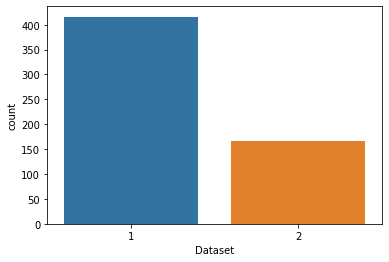

In [12]:

sns.countplot(data=liver_df, x = 'Dataset', label='Count')

LD, NLD = liver_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


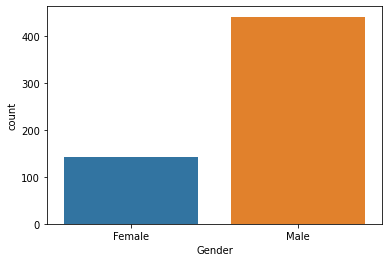

In [13]:
sns.countplot(data=liver_df, x = 'Gender', label='Count')

M, F = liver_df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


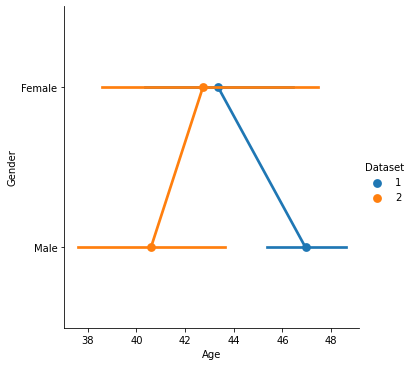

In [14]:
sns.factorplot(x="Age", y="Gender", hue="Dataset", data=liver_df);

Age seems to be a factor for liver disease for both male and female genders

In [15]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).count().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,50
3,2,Male,117
0,1,Female,92
1,1,Male,324


In [16]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,42.740000
3,2,Male,40.598291
0,1,Female,43.347826
1,1,Male,46.950617


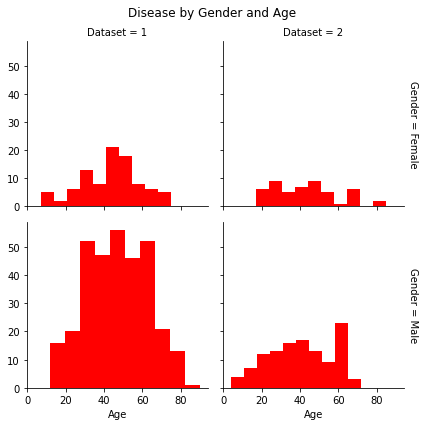

In [17]:
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

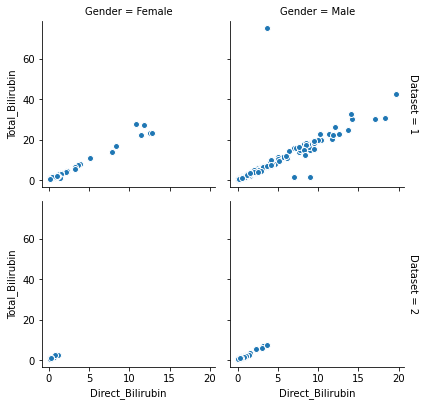

In [18]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

There seems to be direct relationship between Total_Bilirubin and Direct_Bilirubin. We have the possibility of removing one of this feature.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


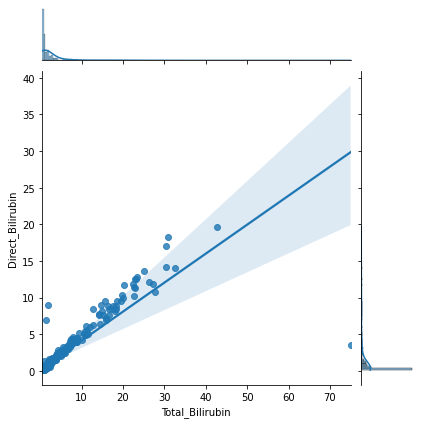

In [19]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=liver_df, kind="reg")

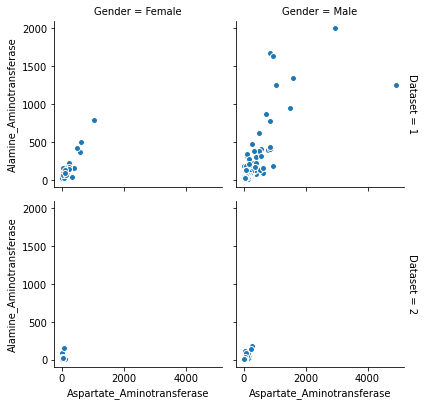

In [20]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. We have the possibility of removing one of this feature.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


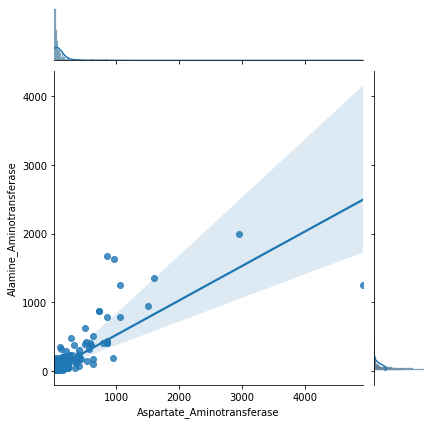

In [21]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

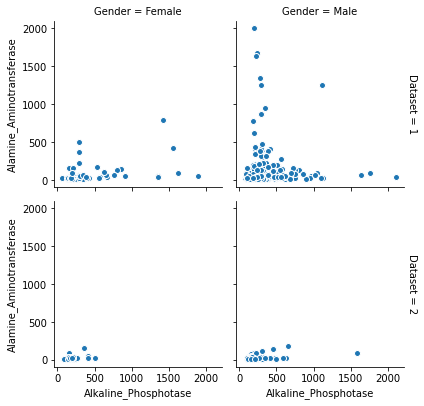

In [22]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


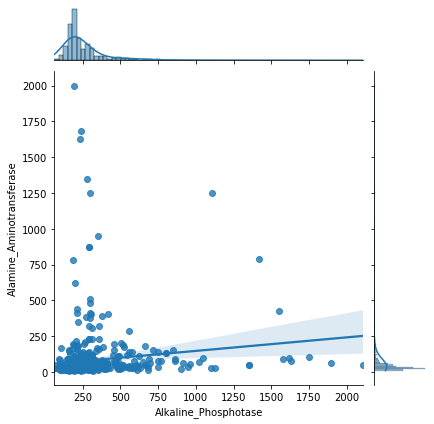

In [23]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

We can observe there's no linear correlation between Alkaline_Phosphotase and Alamine_Aminotransferase

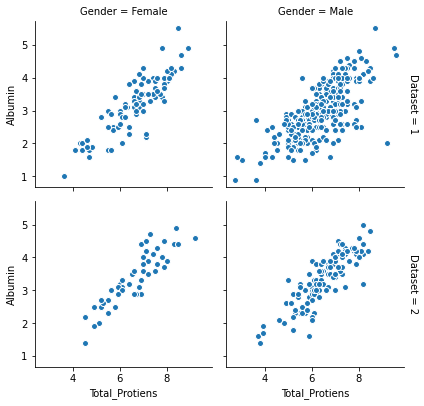

In [24]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Total_Protiens and Albumin and the gender. We have the possibility of removing one of this feature.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


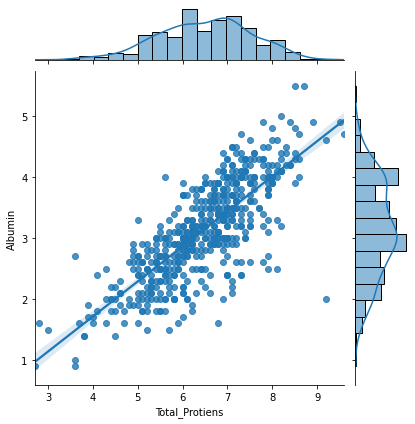

In [25]:
sns.jointplot("Total_Protiens", "Albumin", data=liver_df, kind="reg")

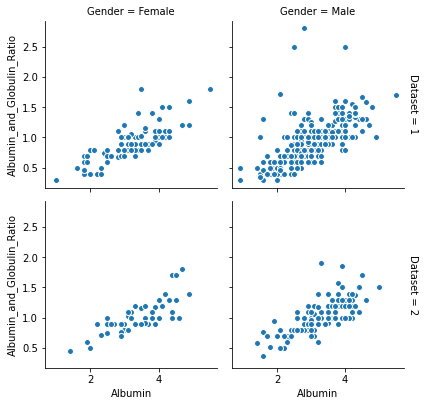

In [26]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


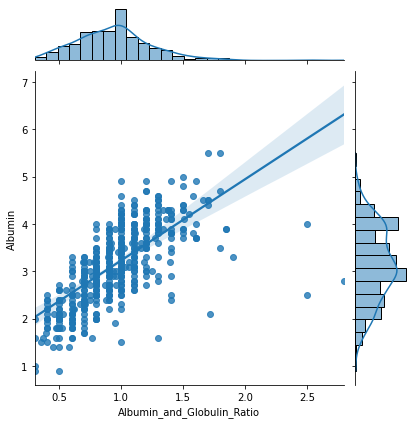

In [27]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=liver_df, kind="reg")

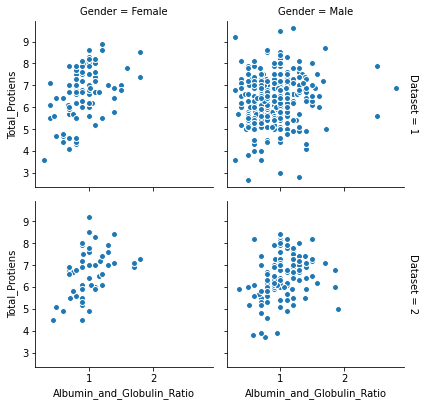

In [28]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

#Observation

From the above jointplots and scatterplots, we find direct relationship between the following features:

*   Direct_Bilirubin & Total_Bilirubin
*   Aspartate_Aminotransferase & Alamine_Aminotransferase
*   Total_Protiens & Albumin
*   Albumin_and_Globulin_Ratio & Albumin


Hence, we can very well find that we can omit one of the features. I'm going to keep the follwing features:

*   Total_Bilirubin
*   Alamine_Aminotransferase
*   Total_Protiens
*   Albumin_and_Globulin_Ratio
*   Albumin


In [29]:
liver_df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [30]:
pd.get_dummies(liver_df['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [31]:
liver_df = pd.concat([liver_df,pd.get_dummies(liver_df['Gender'], prefix = 'Gender')], axis=1)

In [32]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [33]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449,0.243568,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490,0.429603,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [34]:
liver_df[liver_df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1,1,0
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1,0,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2,1,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2,0,1


In [35]:
liver_df["Albumin_and_Globulin_Ratio"] = liver_df.Albumin_and_Globulin_Ratio.fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())

In [36]:
# The input variables/features are all the inputs except Dataset. The prediction or label is 'Dataset' that determines whether the patient has liver disease or not. 
X = liver_df.drop(['Gender','Dataset'], axis=1)
X.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1


In [37]:
y = liver_df['Dataset'] # 1 for liver disease; 2 for no liver disease

In [38]:
# Correlation
liver_corr = X.corr()

In [39]:
liver_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.056560,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.089291,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.100436,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.027496,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.082332,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.080336,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.089121,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.093799,-0.093799
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.003404,-0.003404
Gender_Female,-0.056560,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003404,1.000000,-1.000000


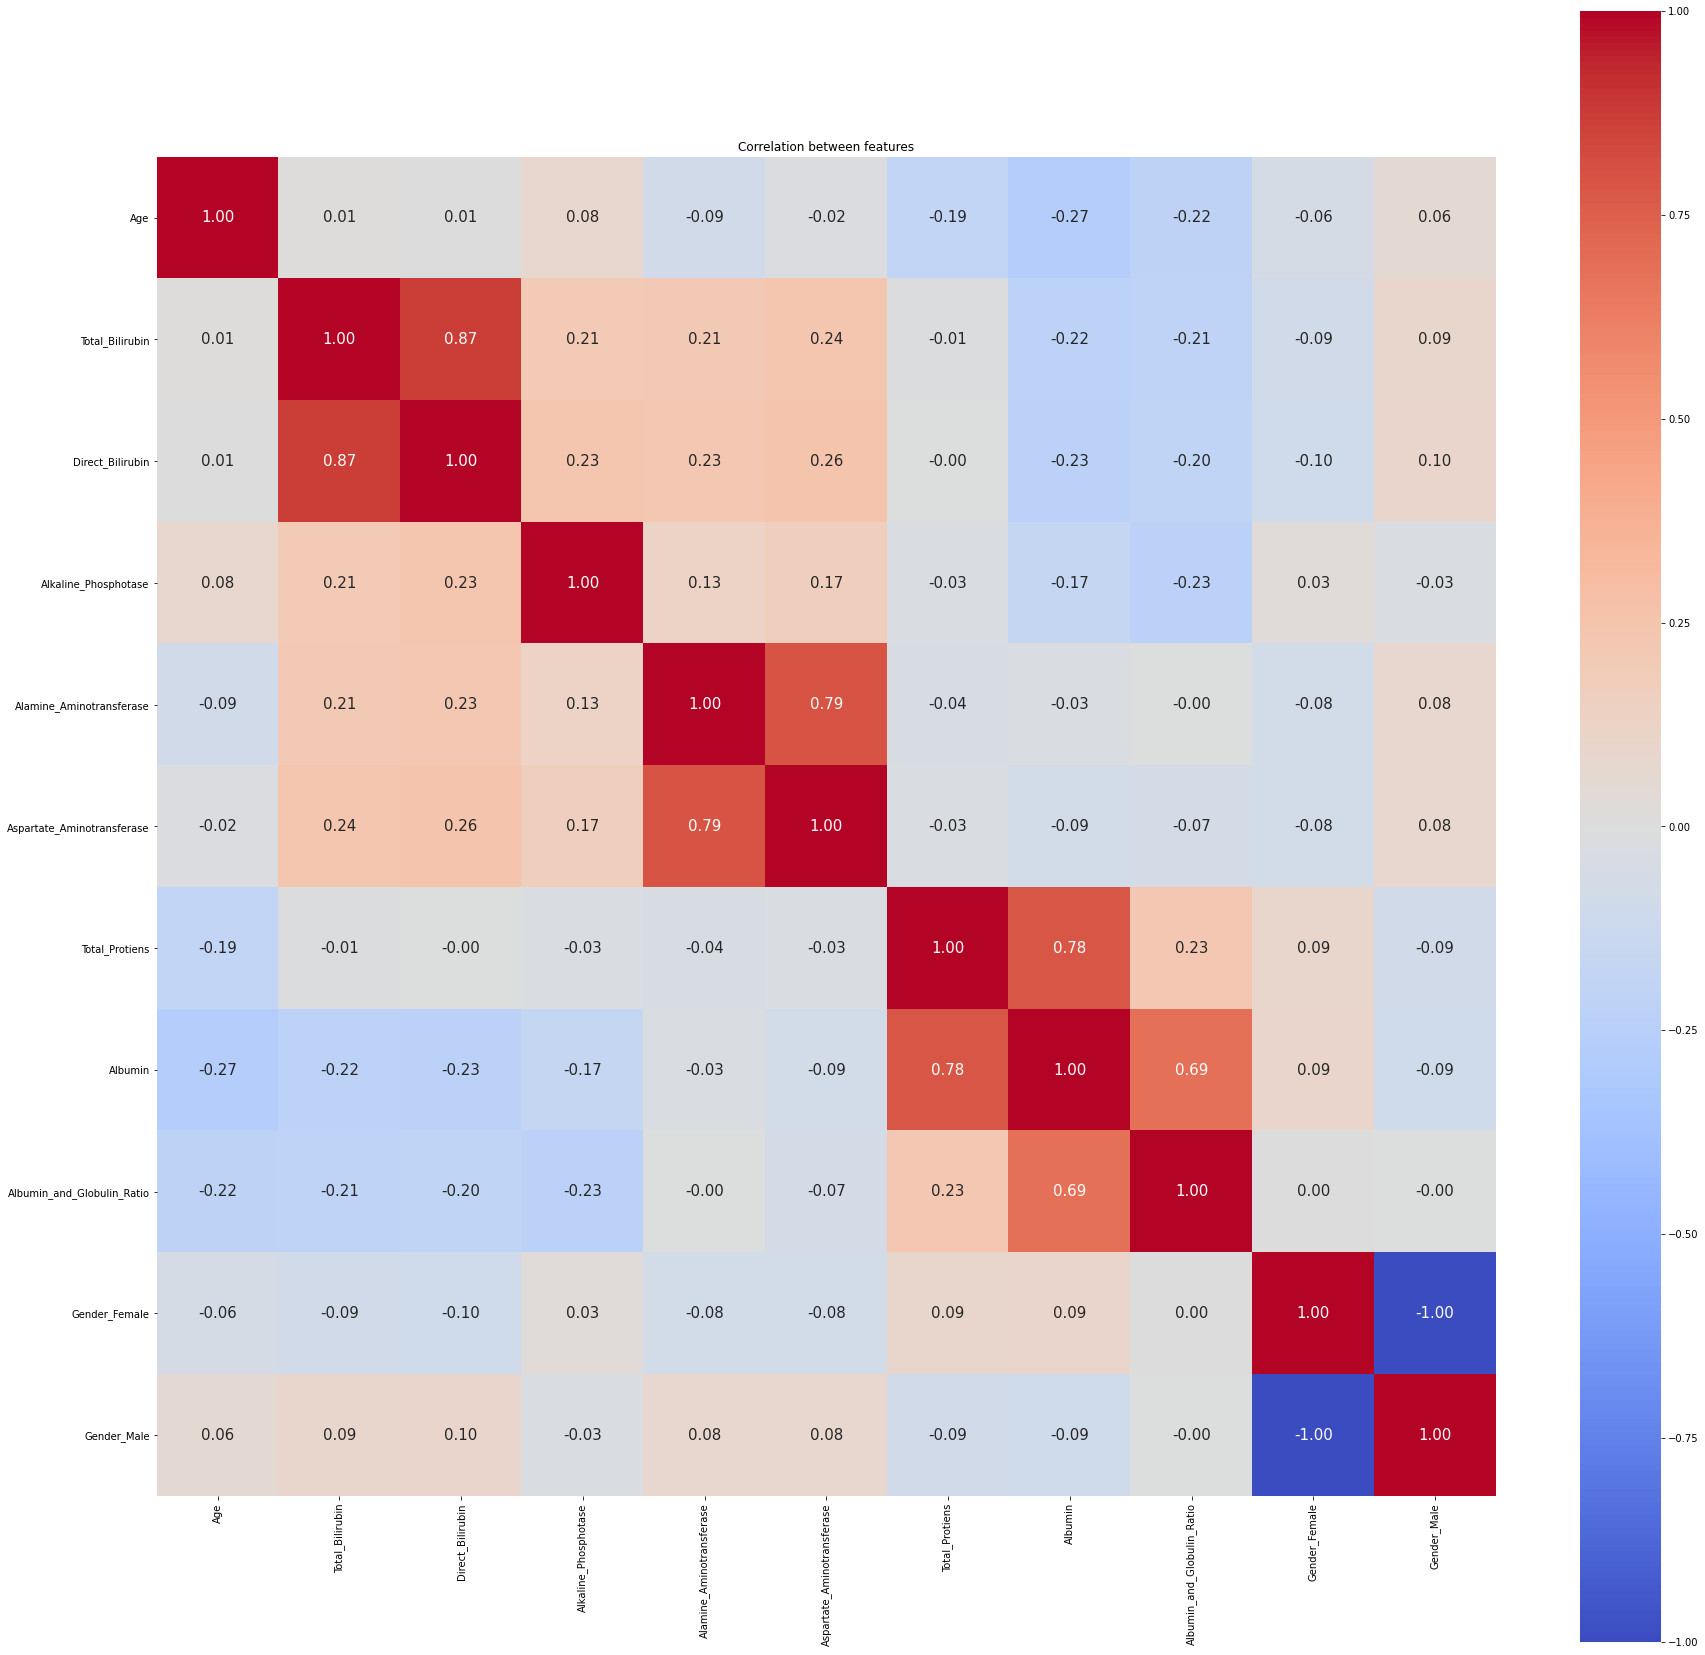

In [40]:
plt.figure(figsize=(30, 30))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

#Machine Learning

In [41]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(408, 11)
(408,)
(175, 11)
(175,)


Logistic Regression Training Score: 
 72.06
Logistic Regression Test Score: 
 68.0
Coefficient: 
 [[-0.00994993 -0.09851215 -0.30688722 -0.00082939 -0.01078829 -0.00275598
  -0.23899668  0.40208934  0.59475503  0.25335289  0.09115994]]
Intercept: 
 [0.36100671]
Accuracy: 
 0.68
Confusion Matrix: 
 [[107  17]
 [ 39  12]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.73      0.86      0.79       124
           2       0.41      0.24      0.30        51

    accuracy                           0.68       175
   macro avg       0.57      0.55      0.55       175
weighted avg       0.64      0.68      0.65       175



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


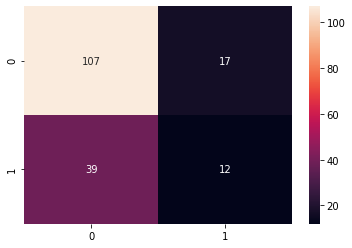

In [43]:
#2) Logistic Regression
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [44]:
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
8,Albumin_and_Globulin_Ratio,0.594755
7,Albumin,0.402089
9,Gender_Female,0.253353
10,Gender_Male,0.091160
3,Alkaline_Phosphotase,-0.000829
5,Aspartate_Aminotransferase,-0.002756
0,Age,-0.009950
4,Alamine_Aminotransferase,-0.010788
1,Total_Bilirubin,-0.098512
6,Total_Protiens,-0.238997


Gaussian Score: 
 56.13
Gaussian Test Score: 
 53.14
Accuracy: 
 0.5314285714285715
[[44 80]
 [ 2 49]]
              precision    recall  f1-score   support

           1       0.96      0.35      0.52       124
           2       0.38      0.96      0.54        51

    accuracy                           0.53       175
   macro avg       0.67      0.66      0.53       175
weighted avg       0.79      0.53      0.53       175



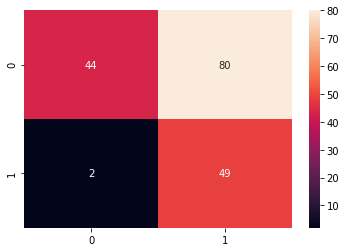

In [45]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

In [46]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Random Forest Score: 
 100.0
Random Forest Test Score: 
 70.86
Accuracy: 
 0.7085714285714285
[[102  22]
 [ 29  22]]
              precision    recall  f1-score   support

           1       0.78      0.82      0.80       124
           2       0.50      0.43      0.46        51

    accuracy                           0.71       175
   macro avg       0.64      0.63      0.63       175
weighted avg       0.70      0.71      0.70       175



In [47]:
###Model evaluation
#We can now rank our evaluation of all the models to choose the best one for our problem. 
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest'],
    'Score': [ logreg_score, gauss_score, random_forest_score],
    'Test Score': [ logreg_score_test, gauss_score_test, random_forest_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
2,Random Forest,100.00,70.86
0,Logistic Regression,72.06,68.00
1,Gaussian Naive Bayes,56.13,53.14


In [48]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

from sklearn.feature_selection import RFE
rfe =RFE(linear, n_features_to_select=3)
rfe.fit(X,y)

Linear Regression Score: 
 13.12
Linear Regression Test Score: 
 8.07
Coefficient: 
 [-2.53338525e-03 -4.02775624e-04 -2.29658815e-02 -2.17508414e-04
 -3.93047877e-04  6.12504741e-05 -5.55814496e-02  8.31023933e-02
  6.22099710e-02  4.61371689e-02 -4.61371689e-02]
Intercept: 
 1.594252888483084


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=3, step=1, verbose=0)

In [49]:
for i in range(len(rfe.ranking_)):
    if rfe.ranking_[i] == 1:
        print(X.columns.values[i])

Total_Protiens
Albumin
Gender_Male


In [50]:
#I'm considering seven important features based on recursive feature elimination
#finX = liver_df[['Age','Direct_Bilirubin','Total_Protiens','Albumin', 'Gender_Female', 'Gender_Male']]
finX = liver_df[['Total_Protiens','Albumin', 'Gender_Male']]
finX.head(4)

,Total_Protiens,Albumin,Gender_Male
0,6.8,3.3,0
1,7.5,3.2,1
2,7.0,3.3,1
3,6.8,3.4,1


In [51]:
X_train, X_test, y_train, y_test = train_test_split(finX, y, test_size=0.30, random_state=101)

Logistic Regression Training Score: 
 71.08
Logistic Regression Test Score: 
 71.43
Coefficient: 
 [[-0.58254377  1.08940697 -0.54185122]]
Intercept: 
 [-0.20423275]
Accuracy: 
 0.7142857142857143
Confusion Matrix: 
 [[120   4]
 [ 46   5]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.72      0.97      0.83       124
           2       0.56      0.10      0.17        51

    accuracy                           0.71       175
   macro avg       0.64      0.53      0.50       175
weighted avg       0.67      0.71      0.63       175



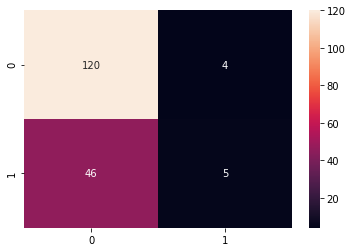

In [52]:
#Logistic Regression
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")